In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
df = pd.read_csv("../data/SHS_TM.csv")
df.head()

,Année,Produits alimentaires,"Vêtem., lingerie, chauss., literie",Industrie textile,Industrie du papier,Arts graphiques,Industrie chimique,"Bois, liège, meubles",Pierre et terre,Industrie d. métaux(2),...,Bureaux de consultation,"Hôtellerie, restaurants",Transports,Administration publique,Réparations,Vachers célibataires,"Employés pour tous travaux, célibataire",Employées pour le ménage et la ferme,Journaliers; dans la salaire y compris l'entretien,Journalières dans la salaire y compris l'entretien
0,1890,108.921199,103.270150,104.821419,112.245346,107.037516,120.666517,99.281174,107.813150,104.544406,...,106.972586,80.297075,101.829687,113.654991,89.279093,35.789977,28.698464,21.108330,1.509717,1.146831
1,1891,111.132797,105.367006,106.949772,114.524439,109.210867,123.116598,101.297036,110.002250,106.667135,...,109.144618,81.927473,103.897295,115.962706,91.091866,36.516677,29.281174,21.536926,1.540371,1.170116
2,1892,112.238596,106.415434,108.013949,115.663986,110.297542,124.341639,102.304967,111.096800,107.728500,...,110.230634,82.742671,104.931098,117.116564,91.998253,36.880027,29.572529,21.751223,1.555698,1.181759
3,1893,113.344395,107.463862,109.078126,116.803532,111.384217,125.566680,103.312897,112.191349,108.789864,...,111.316650,83.557870,105.964902,118.270422,92.904640,37.243377,29.863884,21.965521,1.571025,1.193402
4,1894,117.214691,111.133360,112.802745,120.791946,115.187581,129.854323,106.840655,116.022273,112.504640,...,115.117707,86.411066,109.583216,122.308924,96.076993,38.515102,30.883627,22.715563,1.624670,1.234153


In [4]:
df.set_index('Année', inplace=True)
# Calculate the mean salary across all job categories per year
df['Average Salary'] = df.mean(axis=1)

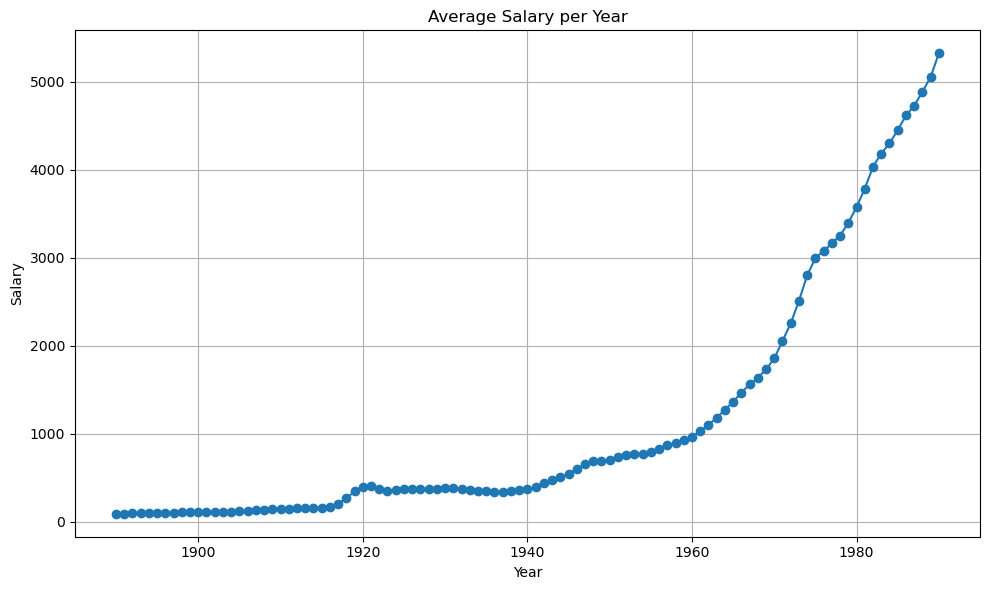

In [6]:
# Plot the average salary trend
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Average Salary'], marker='o')
plt.title('Average Salary per Year')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.grid(True)
plt.tight_layout()
#plt.savefig("plots/avg.png")
plt.show()


In [3]:
df = pd.read_csv("../data/SHS_TM.csv")
df = df.reset_index()
df.columns = [col.replace('#', '').strip() for col in df.columns]
assert "Année" in df.columns, "La colonne 'Année' n'existe toujours pas"
df_long = df.melt(id_vars="Année", var_name="Secteur", value_name="Salaire")

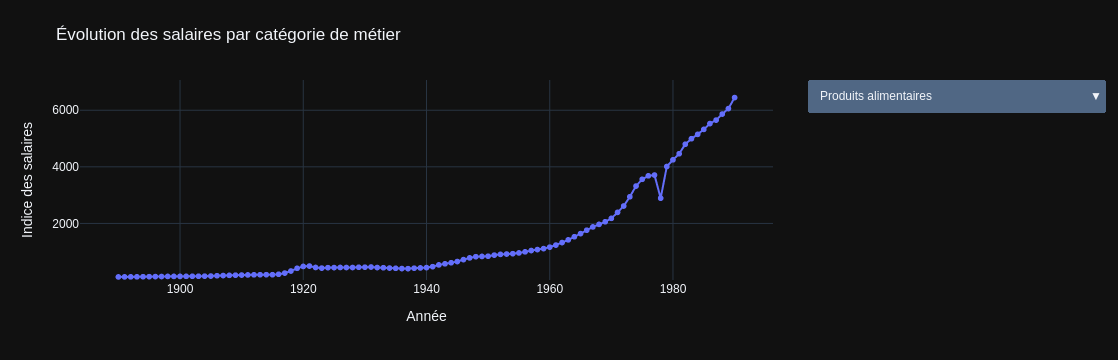

In [6]:
import plotly.io as pio
import json
df = pd.read_csv("../data/SHS_TM.csv")
df = df.reset_index()
df.columns = [col.replace('#', '').strip() for col in df.columns]
assert "Année" in df.columns, "La colonne 'Année' n'existe toujours pas"
df_long = df.melt(id_vars="Année", var_name="Secteur", value_name="Salaire")
df_long = df_long[~df_long['Secteur'].isin(['index', 'Total'])]

fig = px.line(
    df_long,
    x="Année",
    y="Salaire",
    color="Secteur",
    markers=True,
    title="Évolution des salaires par catégorie de métier",
    template="plotly_dark"
)

secteurs = df_long["Secteur"].unique()
for i, trace in enumerate(fig.data):
    trace.visible = (i == 0)

buttons = []
for i, secteur in enumerate(secteurs):
    visibility = [j == i for j in range(len(secteurs))]
    buttons.append(dict(
        label=secteur,
        method="update",
        args=[{"visible": visibility},
              {"title": f"Salaire pour le secteur : {secteur}"}]
    ))
ymin = df_long["Salaire"].min()
ymax = df_long["Salaire"].max()
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction="down",
            x=1.05,       
            xanchor="left",
            y=1,
            yanchor="top",
            showactive=True
        )
    ],
    yaxis=dict(
        title="Indice des salaires",
        range=[ymin, ymax]
    ),
    xaxis_title="Année",
    yaxis_title="Indice des salaires",
    margin=dict(t=80),  
    showlegend=False
)


fig.show()
pio.write_json(fig, "salary_per_job.json")

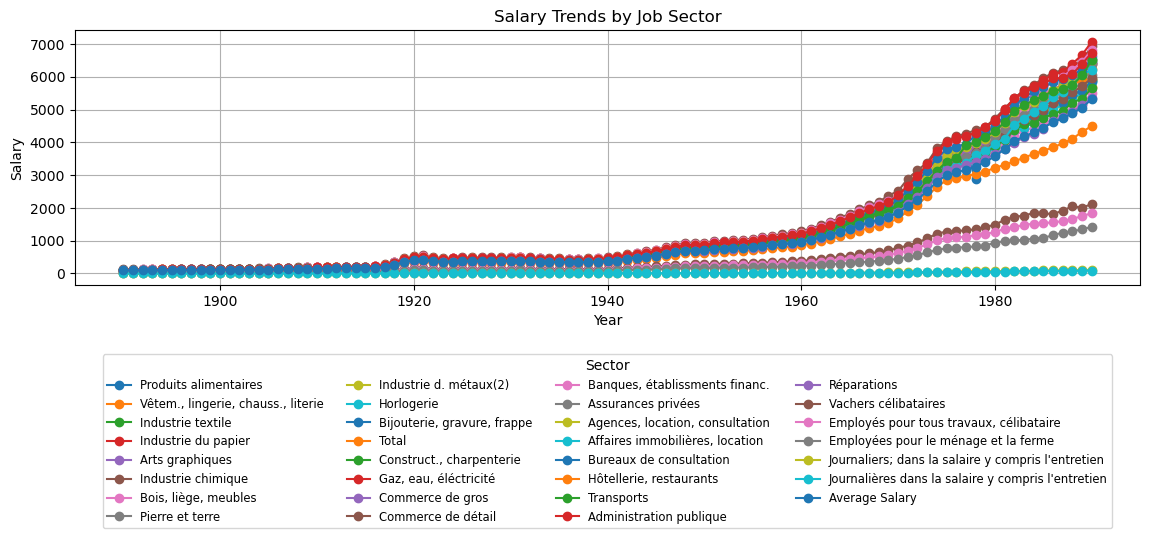

In [7]:
df.plot(figsize=(12, 6), marker='o')
plt.title('Salary Trends by Job Sector')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.grid(True)
plt.legend(
    title='Sector',
    bbox_to_anchor=(0.5, -0.25),  # center bottom
    loc='upper center',
    ncol=4,  # number of columns in the legend
    fontsize='small'
)
plt.tight_layout()
#plt.savefig("plots/sectors.png")
plt.show()